# Customer Onboarding Analysis Tool

## Backround

The following project looks at ways of helping the marketing and credit department at the NHEF Empowerment Fund have a better understanding of our customers. The NHEF Empowerment Fund is a real estate company that sells land (plots) on a payment plan over periods between 1 to 5 years. The idea behind the company was to provide affordbale land and housing options with little to no barriers of entry. It is due to this, that I decided to come up with a way to track certain customers based on key parameters collected. If a customer is identified as potentially needing extra attention by the App, then marketing teams know to continuously engage said customer through targeted marketing by the marketing team and payment reminders by the credit team. Customers that are tagged as needing extra attention will then be placed in a database and their monthly payments monitored for the duration of their loan period.


## Parameters

Parameters being used for this model are as follows; 

1. Gender
2. Marital Status
3. Number of Dependants 
4. Does the customer rent or own a property
5. Employment Status
6. Income
7. Co-Applicant's Income
7. Plot Price
8. Payment Duration in Months (herinafter referred to as a loan)
9. Does the customer have any other debt running?
10. Estate Selection (Customer will pick one of our housing estates, i.e either Riverdale Estate, Chibombo Estate, or Emerald Park Estate)

# 1.The Set Up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
os.chdir('C:/Users/hp/Desktop/Customer_Analysis')

In [2]:
train=pd.read_csv('C:/Users/hp/Desktop/Customer_Analysis/Train_Data.csv')
train.Attention_Needed=train.Attention_Needed.map({'Y':1,'N':0})

In [3]:
train.head()

,ID,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Product_Amount,Loan_Duration_Months,Estate,Any_other_debt,Attention_Needed
0,NHEF001002,Female,No,0,Rent,No,5849,0.0,0,60.0,Riverdale,Y,0
1,NHEF001003,Male,Yes,2,Rent,No,6500,1508.0,128000,60.0,Emerald Park,Y,0
2,NHEF001005,Male,No,0,Rent,Yes,3000,0.0,66000,60.0,Riverdale,Y,0
3,NHEF001006,Female,Yes,1,Own,No,2583,2358.0,120000,60.0,Riverdale,Y,1
4,NHEF001008,Female,No,0,Rent,No,6000,0.0,141000,60.0,Riverdale,Y,0


In [4]:
train.isnull().sum()

ID                       0
Gender                  13
Married                  3
Dependents              15
Rent_or_Own              0
Self_Employed           32
Income                   0
CoapplicantIncome        0
Product_Amount           0
Loan_Duration_Months    14
Estate                   0
Any_other_debt          50
Attention_Needed         0
dtype: int64

In [5]:
Attention_Needed=train.Attention_Needed
train.drop('Attention_Needed',axis=1,inplace=True)
test=pd.read_csv('C:/Users/hp/Desktop/Customer_Analysis/Test_Data.csv')
ID=test.ID
df=train.append(test)
df.head()

,ID,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Product_Amount,Loan_Duration_Months,Estate,Any_other_debt
0,NHEF001002,Female,No,0,Rent,No,5849,0.0,0,60.0,Riverdale,Y
1,NHEF001003,Male,Yes,2,Rent,No,6500,1508.0,128000,60.0,Emerald Park,Y
2,NHEF001005,Male,No,0,Rent,Yes,3000,0.0,66000,60.0,Riverdale,Y
3,NHEF001006,Female,Yes,1,Own,No,2583,2358.0,120000,60.0,Riverdale,Y
4,NHEF001008,Female,No,0,Rent,No,6000,0.0,141000,60.0,Riverdale,Y


In [6]:
df.shape

(981, 12)

<AxesSubplot:>

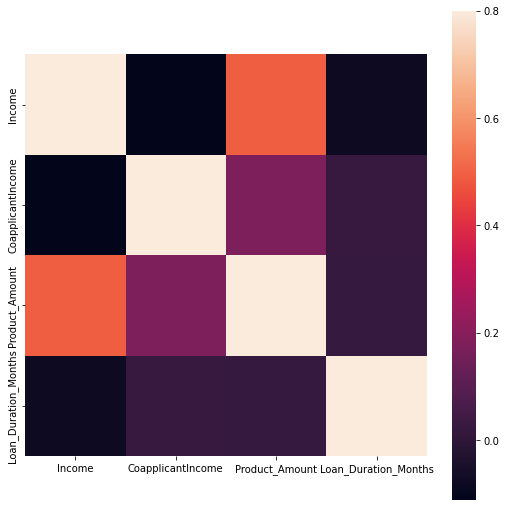

In [7]:
%matplotlib inline 
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

# Encoding

In [9]:
## Gender
df.Gender=df.Gender.map({'Male':1,'Female':0})
df.Gender.value_counts()

1.0    752
0.0    205
Name: Gender, dtype: int64

In [10]:
## Any other debt
df.Any_other_debt=df.Any_other_debt.map({'Y':1,'N':0})
df.Any_other_debt.value_counts()

1.0    754
0.0    148
Name: Any_other_debt, dtype: int64

<AxesSubplot:>

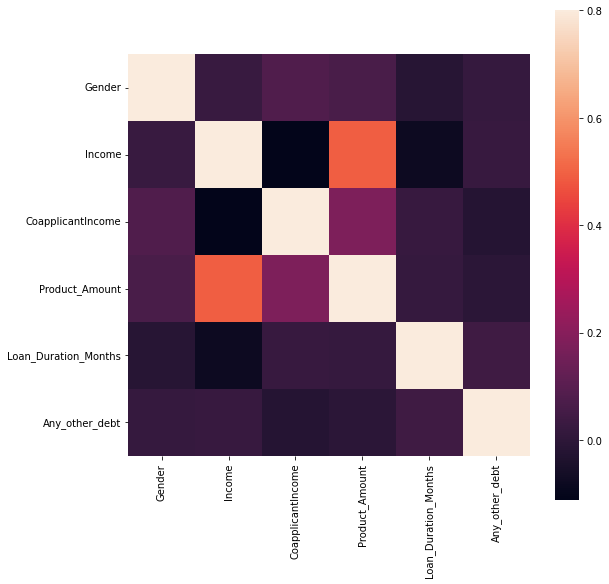

In [11]:
## correlations
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [12]:
## Labelling 0 & 1 for Marrital status
df.Married=df.Married.map({'Yes':1,'No':0})
df.head()

,ID,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Product_Amount,Loan_Duration_Months,Estate,Any_other_debt
0,NHEF001002,0.0,0.0,0,Rent,No,5849,0.0,0,60.0,Riverdale,1.0
1,NHEF001003,1.0,1.0,2,Rent,No,6500,1508.0,128000,60.0,Emerald Park,1.0
2,NHEF001005,1.0,0.0,0,Rent,Yes,3000,0.0,66000,60.0,Riverdale,1.0
3,NHEF001006,0.0,1.0,1,Own,No,2583,2358.0,120000,60.0,Riverdale,1.0
4,NHEF001008,0.0,0.0,0,Rent,No,6000,0.0,141000,60.0,Riverdale,1.0


In [13]:
df.Married.value_counts()

1.0    630
0.0    348
Name: Married, dtype: int64

In [14]:
## Labelling 0 & 1 for Dependents
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [15]:
df.Dependents.value_counts()

0.0    530
1.0    165
2.0    160
3.0    103
Name: Dependents, dtype: int64

<AxesSubplot:>

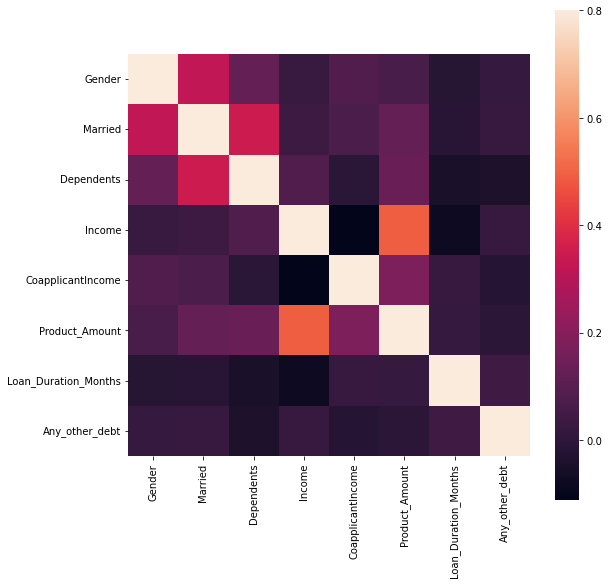

In [16]:
## correlations
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [17]:
df.rename(columns = {'Product_Amount':'Plot_Price'}, inplace = True)
df.head()

,ID,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Plot_Price,Loan_Duration_Months,Estate,Any_other_debt
0,NHEF001002,0.0,0.0,0.0,Rent,No,5849,0.0,0,60.0,Riverdale,1.0
1,NHEF001003,1.0,1.0,2.0,Rent,No,6500,1508.0,128000,60.0,Emerald Park,1.0
2,NHEF001005,1.0,0.0,0.0,Rent,Yes,3000,0.0,66000,60.0,Riverdale,1.0
3,NHEF001006,0.0,1.0,1.0,Own,No,2583,2358.0,120000,60.0,Riverdale,1.0
4,NHEF001008,0.0,0.0,0.0,Rent,No,6000,0.0,141000,60.0,Riverdale,1.0


In [19]:
## Labelling 0 & 1 for Rent or Own
df.Rent_or_Own=df.Rent_or_Own.map({'Rent':1,'Own':0})

In [20]:
df.Rent_or_Own.value_counts()

1    762
0    219
Name: Rent_or_Own, dtype: int64

In [21]:
df.Any_other_debt.value_counts()

1.0    754
0.0    148
Name: Any_other_debt, dtype: int64

In [22]:
## Labelling 0 & 1 for Employment status
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})

In [23]:
df.Estate.value_counts()

Chibombo        350
Riverdale       341
Emerald Park    290
Name: Estate, dtype: int64

In [24]:
## Labelling 0 & 1 for Estate Selections
df.Estate=df.Estate.map({'Riverdale':0,'Chibombo':1,'Emerald Park':2})

<AxesSubplot:>

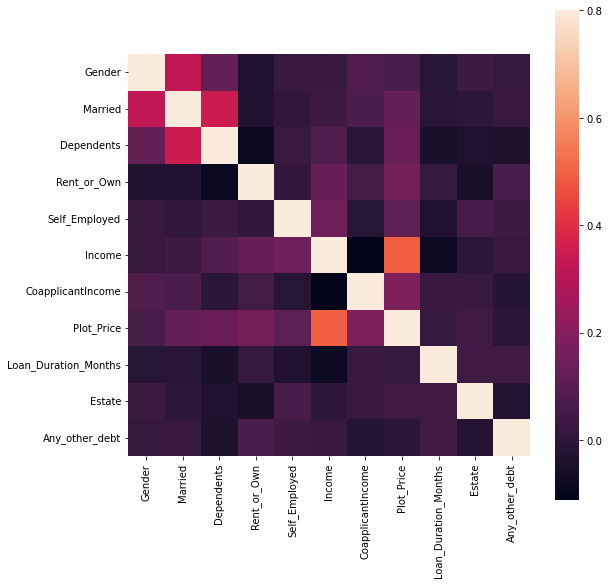

In [25]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [26]:
df.head()

,ID,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Plot_Price,Loan_Duration_Months,Estate,Any_other_debt
0,NHEF001002,0.0,0.0,0.0,1,0.0,5849,0.0,0,60.0,0,1.0
1,NHEF001003,1.0,1.0,2.0,1,0.0,6500,1508.0,128000,60.0,2,1.0
2,NHEF001005,1.0,0.0,0.0,1,1.0,3000,0.0,66000,60.0,0,1.0
3,NHEF001006,0.0,1.0,1.0,0,0.0,2583,2358.0,120000,60.0,0,1.0
4,NHEF001008,0.0,0.0,0.0,1,0.0,6000,0.0,141000,60.0,0,1.0


## Missing Values

In [27]:
df.Married.fillna(np.random.randint(0,2),inplace=True)

In [28]:
df.Any_other_debt.fillna(np.random.randint(0,2),inplace=True)

In [29]:
## Fill empty plot price with median instead of deleting
df.Plot_Price.fillna(df.Plot_Price.median(),inplace=True)

In [30]:
## Fill empty Durations with mean
df.Loan_Duration_Months.fillna(df.Loan_Duration_Months.mean(),inplace=True)

In [31]:
df.isnull().sum()

ID                       0
Gender                  24
Married                  0
Dependents              23
Rent_or_Own              0
Self_Employed           55
Income                   0
CoapplicantIncome        0
Plot_Price               0
Loan_Duration_Months     0
Estate                   0
Any_other_debt           0
dtype: int64

In [32]:
## Filling Gender with random number between 0-2
from random import randint 
df.Gender.fillna(np.random.randint(0,2),inplace=True)

In [33]:
df.Gender.value_counts()

1.0    752
0.0    229
Name: Gender, dtype: int64

In [34]:
## Fill Dependents with median
df.Dependents.fillna(df.Dependents.median(),inplace=True)

In [35]:
df.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [36]:
df.isnull().sum()

ID                      0
Gender                  0
Married                 0
Dependents              0
Rent_or_Own             0
Self_Employed           0
Income                  0
CoapplicantIncome       0
Plot_Price              0
Loan_Duration_Months    0
Estate                  0
Any_other_debt          0
dtype: int64

In [37]:
df.head()

,ID,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Plot_Price,Loan_Duration_Months,Estate,Any_other_debt
0,NHEF001002,0.0,0.0,0.0,1,0.0,5849,0.0,0,60.0,0,1.0
1,NHEF001003,1.0,1.0,2.0,1,0.0,6500,1508.0,128000,60.0,2,1.0
2,NHEF001005,1.0,0.0,0.0,1,1.0,3000,0.0,66000,60.0,0,1.0
3,NHEF001006,0.0,1.0,1.0,0,0.0,2583,2358.0,120000,60.0,0,1.0
4,NHEF001008,0.0,0.0,0.0,1,0.0,6000,0.0,141000,60.0,0,1.0


In [38]:
## No need for ID column for model
df.drop('ID',inplace=True,axis=1)

In [39]:
df.head()

,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Plot_Price,Loan_Duration_Months,Estate,Any_other_debt
0,0.0,0.0,0.0,1,0.0,5849,0.0,0,60.0,0,1.0
1,1.0,1.0,2.0,1,0.0,6500,1508.0,128000,60.0,2,1.0
2,1.0,0.0,0.0,1,1.0,3000,0.0,66000,60.0,0,1.0
3,0.0,1.0,1.0,0,0.0,2583,2358.0,120000,60.0,0,1.0
4,0.0,0.0,0.0,1,0.0,6000,0.0,141000,60.0,0,1.0


# Splitting Data into X and Y for testing

In [40]:
train_X=df.iloc[:614,] ## all the data in X (Train set)
train_y=Attention_Needed  ## Attention Needed will be our Y

In [41]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [44]:
train_X.head()

,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Plot_Price,Loan_Duration_Months,Estate,Any_other_debt
46,1.0,1.0,1.0,1,0.0,5649,0.0,44000,60.0,0,1.0
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126000,60.0,2,1.0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162000,60.0,2,1.0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156000,60.0,0,1.0
283,0.0,0.0,0.0,1,0.0,2822,1666.0,54000,60.0,0,1.0


In [45]:
test_X.head()

,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Plot_Price,Loan_Duration_Months,Estate,Any_other_debt
454,1.0,0.0,0.0,1,1.0,7085,0.0,84000,60.0,1,1.0
52,0.0,0.0,0.0,1,0.0,4230,0.0,112000,60.0,1,1.0
536,1.0,1.0,0.0,1,0.0,6233,3906.0,324000,60.0,0,1.0
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110000,60.0,0,1.0
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97000,60.0,1,1.0


# Using Different types of Machine Learning Model


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [120]:
models=[]
#models.append(("Logistic Regression",LogisticRegression()))
#models.append(("Decision Tree",DecisionTreeClassifier()))
#models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
#models.append(("Support Vector Classifier",SVC()))
#models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
#models.append(("Naive Bayes",GaussianNB()))

In [121]:
scoring='accuracy'

In [122]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [123]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=None)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

RandomForestClassifier()
Random Forest 0.897826


In [126]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 200, random_state=200)
model.fit(train_X, train_y)
pred = model.predict(test_X)
print("Random Forest Model : {:.2f}%".format(accuracy_score(pred,test_y)*100))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Random Forest Model : 84.42%
[[ 28  17]
 [  7 102]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        45
           1       0.86      0.94      0.89       109

    accuracy                           0.84       154
   macro avg       0.83      0.78      0.80       154
weighted avg       0.84      0.84      0.84       154



In [127]:
print(pred)

[0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0
 1 1 1 0 1 1]


In [128]:
X_test=df.iloc[614:,] 

In [129]:
X_test.head()

,Gender,Married,Dependents,Rent_or_Own,Self_Employed,Income,CoapplicantIncome,Plot_Price,Loan_Duration_Months,Estate,Any_other_debt
0,1.0,1.0,1.0,0,0.0,5750,0.0,115000,60.0,0,1.0
1,1.0,1.0,1.0,1,0.0,6076,1500.0,131000,60.0,0,1.0
2,1.0,1.0,3.0,1,0.0,5000,36.0,213000,60.0,0,1.0
3,1.0,1.0,2.0,1,0.0,5640,2546.0,105000,60.0,0,1.0
4,1.0,0.0,3.0,0,0.0,6576,0.0,83000,60.0,0,1.0


In [130]:
prediction = model.predict(X_test)

In [131]:
print(prediction)

[1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0]


In [132]:
## Data test
t = model.predict([[0.0,	0.0,	0.0,	1,	0.0,	5000,	1666.0,	60000.0,	60.0,	1.0,	1]])

In [133]:
print(t)

[0]


In [134]:
with open('The_Predicition_Model_2', 'wb') as files:
    pickle.dump(model, files)